# CONJUNTO DE DATOS DE RENDIMIENTO ACADÉMICO Y ESTUDIANTIL

# Paso 1: Lectura del archivo

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# ID del archivo en Drive
file_id = "1QTSPgtp02ubqWC03iKyagrfGhQp-k_Hz"

# URL directa de descarga
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Cargar dataset
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Nos aseguramos de ver las primeras filas
df.head()

,Student Name,Class/Grade,Study Hours/Day,Attendance %,Exam Score,Favorite Subject,Learning Method,Smartphone Usage (hrs/day)
0,Student_1,Grade 11,4.88,67.52,44.00,Math,Online,4.35
1,Student_2,Grade 11,4.16,99.44,53.48,English,Online,1.26
2,Student_3,Grade 12,3.23,96.33,75.08,Math,Mixed,2.00
3,Student_4,Grade 9,5.51,66.64,83.41,Computer,Offline,3.69
4,Student_5,Grade 11,3.47,94.50,79.23,Computer,Online,0.63


In [ ]:
df.shape

(500, 8)

In [ ]:
# Renombramos columnas a nombres más claros en español
df = df.rename(columns={
    "Student Name": "Nombre",
    "Class/Grade": "Grado",
    "Study Hours/Day": "Horas_Estudio_Dia",
    "Attendance %": "Asistencia_Porc",
    "Exam Score": "Nota_Examen",
    "Favorite Subject": "Curso_Favorito",
    "Learning Method": "Metodo_Aprendizaje",
    "Smartphone Usage (hrs/day)": "Uso_Smartphone_Horas"
})

df.head(5)

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,4.88,67.52,44.00,Math,Online,4.35
1,Student_2,Grade 11,4.16,99.44,53.48,English,Online,1.26
2,Student_3,Grade 12,3.23,96.33,75.08,Math,Mixed,2.00
3,Student_4,Grade 9,5.51,66.64,83.41,Computer,Offline,3.69
4,Student_5,Grade 11,3.47,94.50,79.23,Computer,Online,0.63


In [ ]:
# Guardamos una copia del dataset original por seguridad
df_original = df.copy()

# Paso 2: Eliminar duplicados basados en Nombre y Grado

In [ ]:
# Contamos cuántos duplicados existen en la combinación Nombre + Grado
duplicados_inicial = df.duplicated(subset=["Nombre", "Grado"]).sum()
print("Duplicados antes:", duplicados_inicial)

Duplicados antes: 0


In [ ]:
# Mostramos las filas duplicadas (si existieran)
df[df.duplicated(subset=["Nombre", "Grado"], keep=False)].head(10)

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas


In [ ]:
# Eliminamos duplicados, conservando la primera aparición
df = df.drop_duplicates(subset=["Nombre", "Grado"])

In [ ]:
# 4) Verificamos nuevamente para confirmar que ya no existen duplicados
duplicados_final = df.duplicated(subset=["Nombre", "Grado"]).sum()
print("Duplicados después:", duplicados_final)
print("Dimensiones después del drop_duplicates:", df.shape)

Duplicados después: 0
Dimensiones después del drop_duplicates: (500, 8)


In [ ]:
# Verificamos cuántas veces aparece cada combinación Nombre-Grado
conteos = df.value_counts(subset=["Nombre", "Grado"])
conteos.value_counts()

,count
count,
1,500


In [ ]:
# Ver duplicados SOLO por Grado (sin importar Nombre)
df[df.duplicated(subset=["Grado"], keep=False)].sort_values("Grado")

#MUCHO OJO: Esto normalmente tendrá valores porque varios estudiantes comparten el mismo grado, pero NO es un problema.

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas
443,Student_444,Grade 10,4.94,65.03,66.08,History,Online,1.48
99,Student_100,Grade 10,5.91,79.79,89.49,Science,Online,4.31
100,Student_101,Grade 10,5.09,68.63,65.98,Computer,Online,3.47
436,Student_437,Grade 10,5.99,80.83,97.10,Computer,Offline,0.58
204,Student_205,Grade 10,5.56,90.44,36.08,History,Online,4.50
...,...,...,...,...,...,...,...,...
188,Student_189,Grade 9,3.23,80.98,91.21,History,Online,3.39
388,Student_389,Grade 9,3.19,71.74,51.90,Computer,Offline,2.87
184,Student_185,Grade 9,1.46,75.46,43.91,Science,Online,1.01
191,Student_192,Grade 9,4.99,66.69,58.28,Computer,Mixed,2.40


# Paso 3: MANEJO DE DATOS FALTANTES

In [ ]:
# Primero revisamos cuántos valores faltantes tenemos en cada columna
print("Valores faltantes antes de rellenar:\n")
print(df.isnull().sum())

Valores faltantes antes de rellenar:

Nombre                  0
Grado                   0
Horas_Estudio_Dia       0
Asistencia_Porc         0
Nota_Examen             0
Curso_Favorito          0
Metodo_Aprendizaje      0
Uso_Smartphone_Horas    0
dtype: int64


In [ ]:
# Buscamos una fila que tenga algún valor faltante

fila_con_nan = df[df.isnull().any(axis=1)]
fila_con_nan.head()

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas


In [ ]:
# 3) Rellenamos valores faltantes con la MEDIA (igual que en el TF3)
df["Horas_Estudio_Dia"] = df["Horas_Estudio_Dia"].fillna(df["Horas_Estudio_Dia"].mean()).round(2)
df["Asistencia_Porc"]   = df["Asistencia_Porc"].fillna(df["Asistencia_Porc"].mean()).round(2)
df["Nota_Examen"]       = df["Nota_Examen"].fillna(df["Nota_Examen"].mean()).round(2)
df["Uso_Smartphone_Horas"] = df["Uso_Smartphone_Horas"].fillna(df["Uso_Smartphone_Horas"].mean()).round(2)

# Columnas de texto
df["Nombre"]              = df["Nombre"].fillna("Sin dato")
df["Grado"]               = df["Grado"].fillna("Sin dato")
df["Curso_Favorito"]      = df["Curso_Favorito"].fillna("Sin dato")
df["Metodo_Aprendizaje"]  = df["Metodo_Aprendizaje"].fillna("Sin dato")

In [ ]:
#Guardamos copia del DataFrame limpio después de la imputación
df_limpio = df.copy()
df_limpio.head()

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,4.88,67.52,44.00,Math,Online,4.35
1,Student_2,Grade 11,4.16,99.44,53.48,English,Online,1.26
2,Student_3,Grade 12,3.23,96.33,75.08,Math,Mixed,2.00
3,Student_4,Grade 9,5.51,66.64,83.41,Computer,Offline,3.69
4,Student_5,Grade 11,3.47,94.50,79.23,Computer,Online,0.63


#Paso 4: Crear columna RENDIMIENTO

In [ ]:
# Antes de calcular el rendimiento, reviso una fila específica para ver cómo están sus datos.
# Esto me permite comparar luego si el cálculo se hizo bien.

ejemplo_nombre = df_limpio["Nombre"].iloc[0]
ejemplo_grado  = df_limpio["Grado"].iloc[0]

df_limpio[(df_limpio["Nombre"] == ejemplo_nombre) &
          (df_limpio["Grado"] == ejemplo_grado)]

,Nombre,Grado,Horas_Estudio_Dia,Asistencia_Porc,Nota_Examen,Curso_Favorito,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,4.88,67.52,44.0,Math,Online,4.35


In [ ]:
# 1 # Convertimos la Nota_Examen a escala 0-20
# 2 # Fórmula: nota_20 = nota_100 * 20 / 100

df["Nota_20"] = (df["Nota_Examen"] * 20 / 100).round(2)

# 3 # Convertimos la Asistencia_Porc a escala 0-20
df["Asistencia_20"] = (df["Asistencia_Porc"] * 20 / 100).round(2)

In [ ]:
# Calculamos la columna Rendimiento usando una fórmula sencilla:
# 1 # Calculamos la columna Rendimiento_20 usando una fórmula sencilla:
# 2 # (Nota_20 + Asistencia_20) / 2

df["Rendimiento_20"] = ((df["Nota_20"] + df["Asistencia_20"]) / 2).round(2)

In [ ]:
# 1 # Reordenamos y dejamos solo las columnas que vamos a usar en el análisis
# 2 # Nota_Examen y Asistencia_Porc (0-100) ya no son necesarias en df,
# 3 # porque tenemos Nota_20 y Asistencia_20 y el backup queda en df_limpio.

df = df[[ "Nombre", "Grado", "Curso_Favorito","Horas_Estudio_Dia","Nota_20", "Asistencia_20", "Rendimiento_20","Metodo_Aprendizaje", "Uso_Smartphone_Horas"]]
df.head()

,Nombre,Grado,Curso_Favorito,Horas_Estudio_Dia,Nota_20,Asistencia_20,Rendimiento_20,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,Math,4.88,8.80,13.50,11.15,Online,4.35
1,Student_2,Grade 11,English,4.16,10.70,19.89,15.30,Online,1.26
2,Student_3,Grade 12,Math,3.23,15.02,19.27,17.14,Mixed,2.00
3,Student_4,Grade 9,Computer,5.51,16.68,13.33,15.00,Offline,3.69
4,Student_5,Grade 11,Computer,3.47,15.85,18.90,17.38,Online,0.63


In [ ]:
# Después de crear el rendimiento, verifico la misma fila
df[(df["Nombre"] == ejemplo_nombre) &
   (df["Grado"] == ejemplo_grado)]

,Nombre,Grado,Curso_Favorito,Horas_Estudio_Dia,Nota_20,Asistencia_20,Rendimiento_20,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,Math,4.88,8.8,13.5,11.15,Online,4.35


# Paso 5: Crear serie de bonificación por Método de Aprendizaje y aplicarla con map()

In [ ]:
# Creamos la serie de bonificación según el método de aprendizaje
# Offline suma +1, Mixed suma +0.5 y Online suma 0
bonificacion = pd.Series({"Offline": 1, "Mixed": 0.5, "Online": 0})

# Aplicamos la bonificación usando map()
# map() evalúa cada valor de la columna Metodo_Aprendizaje y lo reemplaza
# según el diccionario que definimos, luego sumamos ese valor a Rendimiento_20
df["Rendimiento_20"] = df["Rendimiento_20"] + df["Metodo_Aprendizaje"].map(bonificacion)

In [ ]:
# Después de aplicar la bonificación, revisamos la misma fila para comprobar el cambio
df[(df["Nombre"] == ejemplo_nombre) & (df["Grado"] == ejemplo_grado)][[
    "Nombre", "Grado", "Curso_Favorito","Horas_Estudio_Dia","Nota_20", "Asistencia_20", "Rendimiento_20","Metodo_Aprendizaje", "Uso_Smartphone_Horas"]]

,Nombre,Grado,Curso_Favorito,Horas_Estudio_Dia,Nota_20,Asistencia_20,Rendimiento_20,Metodo_Aprendizaje,Uso_Smartphone_Horas
0,Student_1,Grade 11,Math,4.88,8.8,13.5,11.15,Online,4.35


#Paso 6: Clasificar estudiantes APROBADO/DESAPROBADO

In [ ]:
# Creamos la columna 'Estado' en base a Rendimiento_20:
# Si el rendimiento es mayor o igual a 12  Aprobado
# Si es menor a 12 Desaprobado

df["Estado"] = df["Rendimiento_20"].apply(lambda x: "Aprobado" if x >= 12 else "Desaprobado")

In [ ]:
# Después de clasificar, muestro la misma fila de ejemplo para verificar el cambio.
# Incluyo Curso_Favorito y otras columnas porque podrían ser útiles
# en el análisis posterior (por ejemplo, rendimiento por curso).

df[(df["Nombre"] == ejemplo_nombre) &
   (df["Grado"] == ejemplo_grado)][
    ["Nombre", "Grado", "Curso_Favorito","Horas_Estudio_Dia","Nota_20", "Asistencia_20", "Rendimiento_20","Metodo_Aprendizaje", "Uso_Smartphone_Horas", "Estado"]
]

,Nombre,Grado,Curso_Favorito,Horas_Estudio_Dia,Nota_20,Asistencia_20,Rendimiento_20,Metodo_Aprendizaje,Uso_Smartphone_Horas,Estado
0,Student_1,Grade 11,Math,4.88,8.8,13.5,11.15,Online,4.35,Desaprobado


# PASO 7: Filtrar estudiantes de un curso favorito específico que estén APROBADOS

In [ ]:
# Primero aplicamos un filtro para seleccionar solo a los que tienen Math
# como curso favorito y además tienen el estado "Aprobado".
# Esto nos permite obtener únicamente a los estudiantes que cumplen ambos criterios.

aprobados_math = df.loc[
    (df["Curso_Favorito"] == "Math") &
    (df["Estado"] == "Aprobado")
]

# Mostramos las primeras filas del resultado para validar que el filtro funcionó correctamente
aprobados_math.head()

,Nombre,Grado,Curso_Favorito,Horas_Estudio_Dia,Nota_20,Asistencia_20,Rendimiento_20,Metodo_Aprendizaje,Uso_Smartphone_Horas,Estado
2,Student_3,Grade 12,Math,3.23,15.02,19.27,17.64,Mixed,2.00,Aprobado
6,Student_7,Grade 10,Math,5.57,16.21,12.02,14.62,Mixed,2.01,Aprobado
9,Student_10,Grade 11,Math,1.54,18.42,16.01,17.72,Mixed,2.48,Aprobado
12,Student_13,Grade 11,Math,3.96,17.18,12.87,15.52,Mixed,1.85,Aprobado
14,Student_15,Grade 9,Math,5.51,11.53,16.52,14.02,Online,1.90,Aprobado


#Paso 8: Agrupar por Curso y obtener:
- Promedio general
- Cantidad de aprobados
- Nota máxima (Promedio)

In [ ]:
# Traduzco los nombres de los cursos al español para que el análisis sea mas entendible

mapa_cursos = {
    "Math": "Matemáticas",
    "English": "Inglés",
    "Computer": "Computación",
    "History": "Historia",
    "Science": "Ciencias"
}

df["Curso_Favorito"] = df["Curso_Favorito"].replace(mapa_cursos)

# Verifico que el cambio se haya aplicado correctamente
df["Curso_Favorito"].value_counts()

,count
Curso_Favorito,
Matemáticas,116
Computación,105
Inglés,102
Ciencias,95
Historia,82


In [ ]:
# Agrupamos por Curso_Favorito obteniendo tres indicadores del rendimiento
resumen = df.groupby("Curso_Favorito").agg(
    Promedio_Rendimiento=("Rendimiento_20", "mean"),
    Aprobados=("Estado", lambda x: (x == "Aprobado").sum()),
    Rendimiento_Maximo=("Rendimiento_20", "max")
).reset_index()

resumen.head()

,Curso_Favorito,Promedio_Rendimiento,Aprobados,Rendimiento_Maximo
0,Ciencias,15.489579,87,19.56
1,Computación,15.385905,97,20.52
2,Historia,14.804878,74,20.24
3,Inglés,15.116176,92,19.84
4,Matemáticas,15.514397,110,20.48


In [ ]:
# Creamos una tabla auxiliar con información adicional por curso favorito
tabla_cursos = pd.DataFrame({
    "Curso_Favorito": ["Matemáticas", "Inglés", "Computación", "Historia", "Ciencias"],
    "Area": [
        "Matemáticas",
        "Idiomas",
        "Tecnología",
        "Ciencias Sociales",
        "Ciencias Naturales"
    ],
    "Codigo": [101, 102, 103, 104, 105]
})

# Fusiono el resumen con la tabla de cursos para añadir el área y el código
resumen_final = resumen.merge(tabla_cursos, on="Curso_Favorito", how="left")

# Redondeo a 2 decimales las columnas numéricas de resumen
resumen_final[["Promedio_Rendimiento", "Rendimiento_Maximo"]] = (
    resumen_final[["Promedio_Rendimiento", "Rendimiento_Maximo"]].round(2)
)

# Muestro el resultado final
resumen_final.head()

,Curso_Favorito,Promedio_Rendimiento,Aprobados,Rendimiento_Maximo,Area,Codigo
0,Ciencias,15.49,87,19.56,Ciencias Naturales,105
1,Computación,15.39,97,20.52,Tecnología,103
2,Historia,14.80,74,20.24,Ciencias Sociales,104
3,Inglés,15.12,92,19.84,Idiomas,102
4,Matemáticas,15.51,110,20.48,Matemáticas,101


In [ ]:
df_final = df[[
    "Nombre",
    "Grado",
    "Curso_Favorito",
    "Horas_Estudio_Dia",
    "Nota_20",
    "Asistencia_20",
    "Rendimiento_20",
    "Metodo_Aprendizaje",
    "Uso_Smartphone_Horas",
    "Estado"
]]

In [ ]:
# Exportamos la tabla final por estudiante
df_final.to_csv("estudiantes_detallado.csv", index=False)

# Exportamos el resumen final por curso
resumen_final.to_csv("resumen_estudiantes_por_curso.csv", index=False)

#Estructura IF / ELIF / ELSE

In [ ]:
#ESTRUCTURA IF – Clasificación del nivel de rendimiento
# En este bloque aplicamos una estructura condicional (IF)

def clasificar_nivel(nota):
    # Si la nota es mayor o igual a 17, el rendimiento es alto
    if nota >= 17:
        return "Alto"
    # Si la nota es mayor o igual a 12, el rendimiento es medio
    elif nota >= 12:
        return "Medio"
    # Caso contrario, se considera un rendimiento bajo
    else:
        return "Bajo"

# Aplicamos la función a la columna Nota_20 para crear una nueva variable
df["Nivel"] = df["Nota_20"].apply(clasificar_nivel)

# Mostramos las primeras filas para verificar el resultado
df[["Nota_20", "Nivel"]].head()


,Nota_20,Nivel
0,8.80,Bajo
1,10.70,Bajo
2,15.02,Medio
3,16.68,Medio
4,15.85,Medio


In [ ]:
#ESTRUCTURA FOR
# Recorremos cada valor de la columna Nota_20

suma_notas = 0      # variable acumuladora
contador = 0        # variable de conteo

for nota in df["Nota_20"]:     # Recorremos cada nota del dataset
    suma_notas += nota         # Sumamos la nota al acumulador
    contador += 1              # Contamos cuántos registros se procesan

promedio_manual = suma_notas / contador   # Calculamos el promedio

print("Suma total de notas (con FOR):", round(suma_notas, 2))
print("Promedio manual (con FOR):", round(promedio_manual, 2))



Suma total de notas (con FOR): 6770.28
Promedio manual (con FOR): 13.54


In [ ]:
#ESTRUCTURA WHILE – Búsqueda de un caso específico

i = 0  # Comenzamos desde la primera fila del dataset

while i < len(df):  # Recorremos mientras no superemos el número total de filas
    # Verificamos si la nota del estudiante actual es menor a 10
    if df.loc[i, "Nota_20"] < 10:
        print("Primer alumno con nota baja encontrado:")
        print("Nombre:", df.loc[i, "Nombre"])
        print("Nota:", df.loc[i, "Nota_20"])
        break
    i += 1

Primer alumno con nota baja encontrado:
Nombre: Student_1
Nota: 8.8


#Manejo de errores - TRY/EXCEPT

In [ ]:
#MANEJO DE ERRORES
# En este bloque demostramos cómo Python maneja fallos comunes

print("Probando manejo de errores")

# Error 1: Acceso a una columna inexistente (KeyError)
# TRY intenta ejecutar el código.
# EXCEPT captura el error si la columna no existe.

try:
    df["Columna_NoExiste"].mean()   # Esta columna no existe
except KeyError:
    print("Error: intentaste acceder a una columna inexistente.")


# Error 2: División entre cero (ZeroDivisionError)
# EXCEPT evita que el programa se detenga.

try:
    suma = df["Nota_20"].sum()      # Suma total de notas
    resultado = suma / 0            # Operación inválida
except ZeroDivisionError:
    print("Error: división entre cero detectada.")
except Exception as e:
    # Cualquier otro error no previsto
    print("Ocurrió un error inesperado:", e)

Probando manejo de errores
Error: intentaste acceder a una columna inexistente.


/tmp/ipython-input-1153925337.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  resultado = suma / 0            # Operación inválida


#PASO 1 — Introducción a NumPy: creación de arreglos

In [ ]:
import numpy as np

# Convertimos la columna "Nota_20" a un arreglo NumPy
notas = df["Nota_20"].to_numpy()

# Ejemplo simple para mostrar NumPy
arr = np.array([1, 2, 3, 4, 5])

arr, notas[:5]

(array([1, 2, 3, 4, 5]), array([ 8.8 , 10.7 , 15.02, 16.68, 15.85]))

#PASO 2 — Funciones Universales: operaciones vectorizadas



In [ ]:
# Multiplicamos las notas por 2 (elemento a elemento)
notas_doble = np.multiply(notas, 2)

# Sacamos la raíz cuadrada de las notas
notas_raiz = np.sqrt(notas)

# Redondeamos las notas a enteros
notas_redondeadas = np.round(notas)

# Mostramos los primeros 5 resultados de cada operación
notas_doble[:5], notas_raiz[:5], notas_redondeadas[:5]

(array([17.6 , 21.4 , 30.04, 33.36, 31.7 ]),
 array([2.96647939, 3.27108545, 3.87556448, 4.08411557, 3.98120585]),
 array([ 9., 11., 15., 17., 16.]))

#PASO 3 — Manipulación Numérica: normalización

In [ ]:
# Normalizamos las notas para que estén entre 0 y 1
notas_norm = (notas - np.min(notas)) / (np.max(notas) - np.min(notas))

# Mostramos las primeras 5 notas normalizadas
notas_norm[:5]

array([0.13713405, 0.2835131 , 0.61633282, 0.74422188, 0.68027735])

#PASO 4 — Clasificación NumPy usando np.where (manipulación de datos)

In [ ]:
# Creamos una nueva columna con una clasificación según la nota
df["Rendimiento_NumPy"] = np.where(notas >= 80,
                                   "Alto según NumPy",
                                   "No Alto")

# Mostramos las primeras filas con la nueva clasificación
df[["Nombre", "Nota_20", "Rendimiento_NumPy"]].head()

,Nombre,Nota_20,Rendimiento_NumPy
0,Student_1,8.80,No Alto
1,Student_2,10.70,No Alto
2,Student_3,15.02,No Alto
3,Student_4,16.68,No Alto
4,Student_5,15.85,No Alto


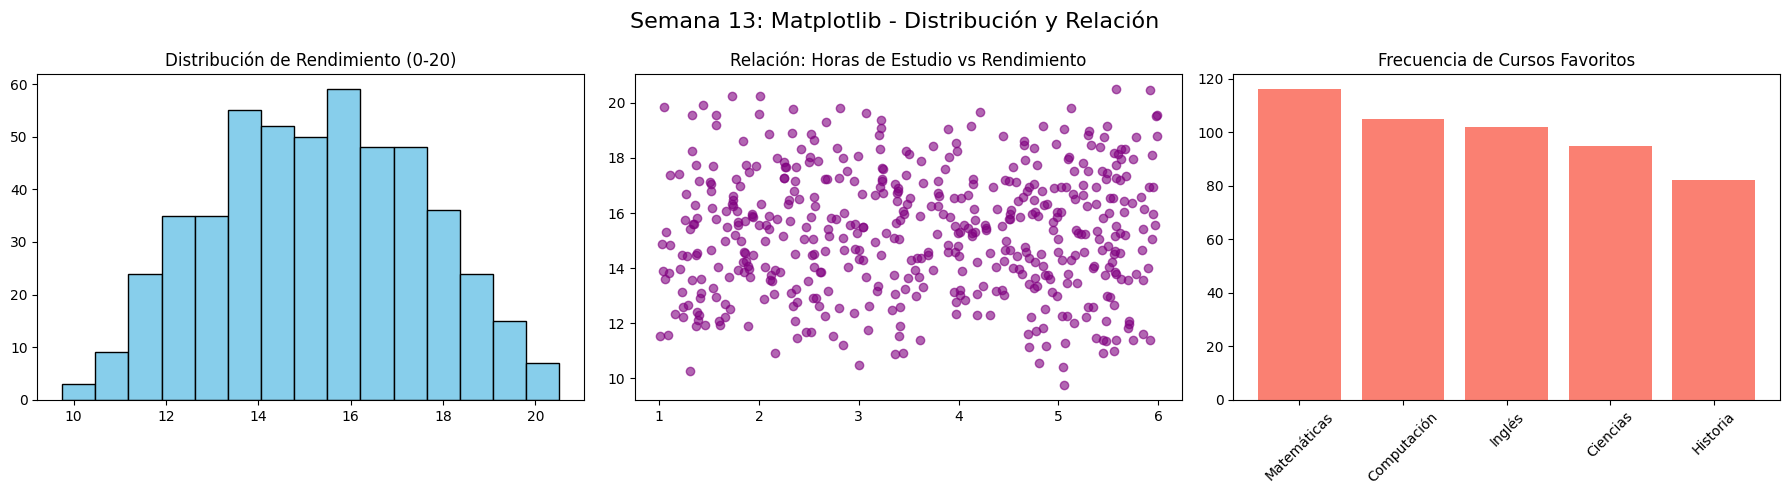

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
df = pd.read_csv('estudiantes_detallado.csv')
plt.style.use('default')

# Crea 3 subplots en una sola fila (Layout)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Semana 13: Matplotlib - Distribución y Relación', fontsize=16)

# A. Histograma (Distribución de Rendimiento)
axs[0].hist(df['Rendimiento_20'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Rendimiento (0-20)')

# B. Scatter Plot (Relación: Estudio vs. Rendimiento)
axs[1].scatter(df['Horas_Estudio_Dia'], df['Rendimiento_20'], color='purple', alpha=0.6)
axs[1].set_title('Relación: Horas de Estudio vs Rendimiento')

# C. Gráfico de Barras (Frecuencias de Cursos Favoritos)
conteo = df['Curso_Favorito'].value_counts()
axs[2].bar(conteo.index, conteo.values, color='salmon')
axs[2].set_title('Frecuencia de Cursos Favoritos')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3302930644.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Grado', y='Rendimiento_20', palette='Set2')


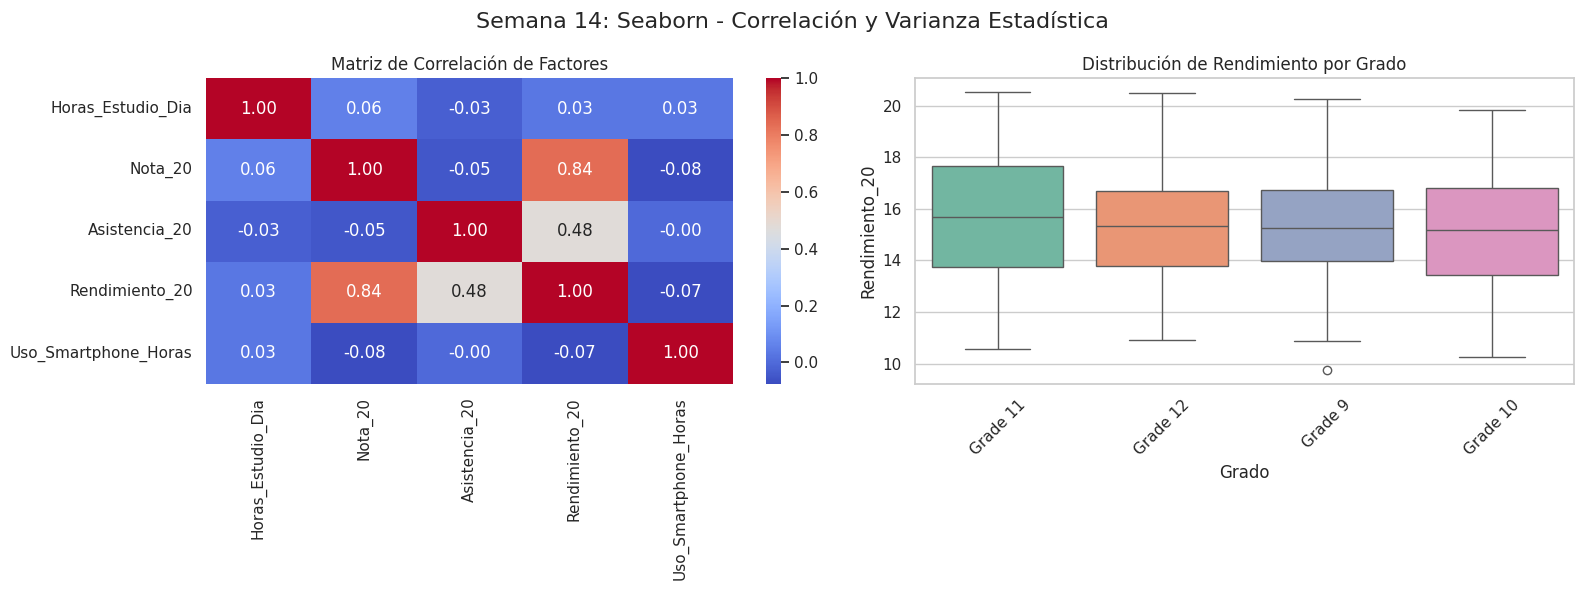

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('estudiantes_detallado.csv')
sns.set_theme(style="whitegrid")

# Columnas numéricas específicas para el análisis (Unidades 2 y 3)
numeric_cols = ['Horas_Estudio_Dia', 'Nota_20', 'Asistencia_20', 'Rendimiento_20', 'Uso_Smartphone_Horas']
corr_matrix = df[numeric_cols].corr() # Cálculo rápido de correlación

# Crea Boxplot y Heatmap lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Semana 14: Seaborn - Correlación y Varianza Estadística', fontsize=16)

# A. Heatmap (Mapa de Calor)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Matriz de Correlación de Factores')

# B. Boxplot (Distribución de Rendimiento por Grado)
sns.boxplot(ax=axes[1], data=df, x='Grado', y='Rendimiento_20', palette='Set2')
axes[1].set_title('Distribución de Rendimiento por Grado')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-236636825.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Nivel_Rendimiento', y='Uso_Smartphone_Horas', palette='muted')


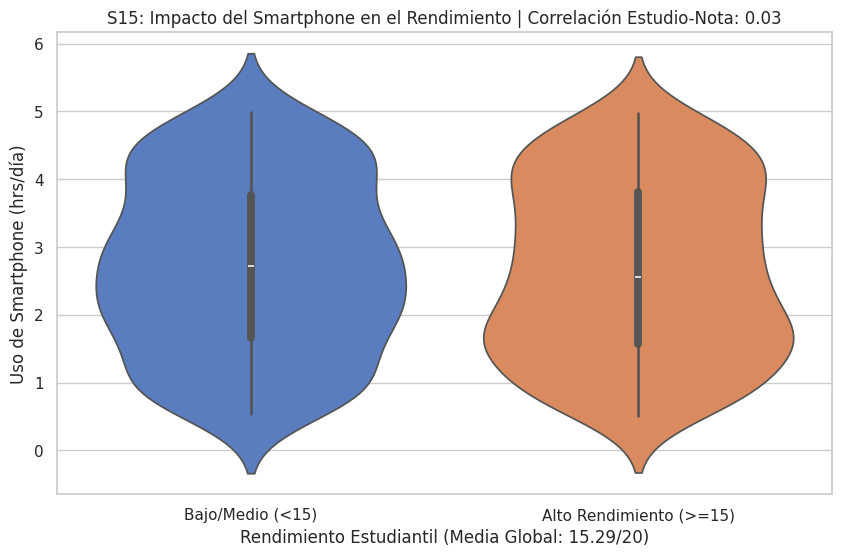

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('estudiantes_detallado.csv')
sns.set_theme(style="whitegrid")

# --- LIMPIEZA Y TRANSFORMACIÓN (Unidades 2 y 3) ---
# Imputación de nulos (ejemplo de limpieza profesional con la mediana)
df['Uso_Smartphone_Horas'] = df['Uso_Smartphone_Horas'].fillna(
    df['Uso_Smartphone_Horas'].median()
)

# Creación de variable de Rendimiento (Lógica de negocio con np.where)
# Se asume >= 15/20 es un Rendimiento Alto
df['Nivel_Rendimiento'] = np.where(df['Rendimiento_20'] >= 15, 'Alto Rendimiento (>=15)', 'Bajo/Medio (<15)')

# Cálculos para títulos (Métricas clave)
promedio = df['Rendimiento_20'].mean()
corr_estudio = df['Horas_Estudio_Dia'].corr(df['Rendimiento_20'])

# --- VISUALIZACIÓN DE CONCLUSIÓN (UNIDAD 4) ---
plt.figure(figsize=(10, 6))
# Violin Plot: Muestra la densidad de uso del smartphone vs. la nueva categoría
sns.violinplot(data=df, x='Nivel_Rendimiento', y='Uso_Smartphone_Horas', palette='muted')
plt.title(f'S15: Impacto del Smartphone en el Rendimiento | Correlación Estudio-Nota: {corr_estudio:.2f}')
plt.ylabel('Uso de Smartphone (hrs/día)')
plt.xlabel(f'Rendimiento Estudiantil (Media Global: {promedio:.2f}/20)')
plt.show()